In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Take price in Crore and area in marla
df = pd.read_csv('final data mid (1) (3).csv')
df.head() 

,price in crore,type,location,District,bathroom,bedroom,area,latitude,longitude
0,0.2500,Flat,Bahria Town Karachi,Malir,2,2,4.9,25.021452,67.303431
1,0.9720,Flat,Bahria Town Karachi,Malir,4,4,5.4,25.021452,67.303431
2,0.7420,Flat,Bahria Town Karachi,Malir,3,3,4.2,25.021452,67.303431
3,0.4464,Flat,Bahria Town Karachi,Malir,2,2,2.5,25.021452,67.303431
4,4.1000,House,DHA Defence,South,4,3,4.0,24.798393,67.032767


In [3]:
dummy_1 =pd.get_dummies(df.type)
dummy_1

,Farm House,Flat,House,Lower Portion,Penthouse,Upper Portion
0,0,1,0,0,0,0
1,0,1,0,0,0,0
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,0,0,1,0,0,0
...,...,...,...,...,...,...
23411,0,0,1,0,0,0
23412,0,1,0,0,0,0
23413,0,1,0,0,0,0
23414,0,1,0,0,0,0


In [4]:
merge = pd.concat([df,dummy_1],axis='columns')
merge

,price in crore,type,location,District,bathroom,bedroom,area,latitude,longitude,Farm House,Flat,House,Lower Portion,Penthouse,Upper Portion
0,0.2500,Flat,Bahria Town Karachi,Malir,2,2,4.900000,25.021452,67.303431,0,1,0,0,0,0
1,0.9720,Flat,Bahria Town Karachi,Malir,4,4,5.400000,25.021452,67.303431,0,1,0,0,0,0
2,0.7420,Flat,Bahria Town Karachi,Malir,3,3,4.200000,25.021452,67.303431,0,1,0,0,0,0
3,0.4464,Flat,Bahria Town Karachi,Malir,2,2,2.500000,25.021452,67.303431,0,1,0,0,0,0
4,4.1000,House,DHA Defence,South,4,3,4.000000,24.798393,67.032767,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23411,1.9900,House,Gadap Town,Malir,3,3,7.933872,25.092281,66.961481,0,0,1,0,0,0
23412,70.0000,Flat,Federal B Area,Central,3,3,4.958670,24.927473,67.064127,0,1,0,0,0,0
23413,3.8000,Flat,Cantt,Malir,4,4,10.942132,24.855068,67.049931,0,1,0,0,0,0
23414,3.0600,Flat,Cantt,Malir,3,3,9.454531,24.855068,67.049931,0,1,0,0,0,0


In [5]:
final = merge.drop(['location','type','District'],axis='columns')
final

,price in crore,bathroom,bedroom,area,latitude,longitude,Farm House,Flat,House,Lower Portion,Penthouse,Upper Portion
0,0.2500,2,2,4.900000,25.021452,67.303431,0,1,0,0,0,0
1,0.9720,4,4,5.400000,25.021452,67.303431,0,1,0,0,0,0
2,0.7420,3,3,4.200000,25.021452,67.303431,0,1,0,0,0,0
3,0.4464,2,2,2.500000,25.021452,67.303431,0,1,0,0,0,0
4,4.1000,4,3,4.000000,24.798393,67.032767,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
23411,1.9900,3,3,7.933872,25.092281,66.961481,0,0,1,0,0,0
23412,70.0000,3,3,4.958670,24.927473,67.064127,0,1,0,0,0,0
23413,3.8000,4,4,10.942132,24.855068,67.049931,0,1,0,0,0,0
23414,3.0600,3,3,9.454531,24.855068,67.049931,0,1,0,0,0,0


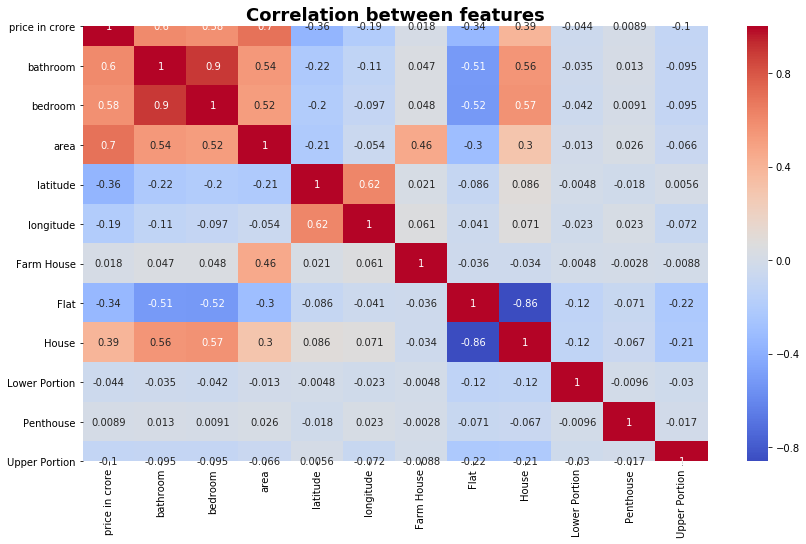

In [6]:
#correlatin
train_corr=final.corr()
f,ax=plt.subplots(figsize=(14,8))
sns.heatmap(train_corr,cmap='coolwarm',annot=True)
plt.title("Correlation between features",weight='bold',fontsize=18)
plt.show()

In [7]:
X = final.iloc[:, 1:].values 
 
Y = final.iloc[:, 0].values

In [8]:
print(Y)

[0.25  0.972 0.742 ... 3.8   3.06  2.7  ]


In [9]:
print(X)

[[ 2.         2.         4.9       ...  0.         0.         0.       ]
 [ 4.         4.         5.4       ...  0.         0.         0.       ]
 [ 3.         3.         4.2       ...  0.         0.         0.       ]
 ...
 [ 4.         4.        10.9421318 ...  0.         0.         0.       ]
 [ 3.         3.         9.4545308 ...  0.         0.         0.       ]
 [ 3.         3.         9.4545308 ...  0.         0.         0.       ]]


In [10]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23416 entries, 0 to 23415
Data columns (total 12 columns):
price in crore    23416 non-null float64
bathroom          23416 non-null int64
bedroom           23416 non-null int64
area              23416 non-null float64
latitude          23416 non-null float64
longitude         23416 non-null float64
Farm House        23416 non-null uint8
Flat              23416 non-null uint8
House             23416 non-null uint8
Lower Portion     23416 non-null uint8
Penthouse         23416 non-null uint8
Upper Portion     23416 non-null uint8
dtypes: float64(4), int64(2), uint8(6)
memory usage: 1.2 MB


In [11]:
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0) 

In [12]:
from sklearn.preprocessing import StandardScaler 
 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test) 

In [13]:
from sklearn.ensemble import RandomForestRegressor
 
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X_train, Y_train)

RandomForestRegressor(random_state=0)

In [14]:
Y_pred = regressor.predict(X_test) 
Y_pred   

array([ 3.70596015,  6.51196157,  0.29728443, ..., 10.98196679,
        1.49505156,  0.39286786])

In [16]:
# The R² score tells us how much our model is able to explain the variation in the dataset.
#Having a score of 0.90 indicates that our model can explain 90% of the variation in the dataset.
from sklearn.metrics import r2_score
r2_score(Y_test,Y_pred)

0.8725812114227081

In [17]:
print(regressor.score(X_train, Y_train))

0.9391286792565958


In [18]:
from sklearn import metrics
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred))) 
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred)) 
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred)) 

Root Mean Squared Error: 1.6152505553193979
Mean Squared Error: 2.609034356459623
Mean Absolute Error: 0.5187425994391655


In [19]:
print("Mean sq. errror between y_test and predicted =", np.mean(Y_pred-Y_test)**2)

Mean sq. errror between y_test and predicted = 0.00047661932332051214


In [22]:
regressor.predict([[2,2,4.900000,25.021452,67.303431,0,1,0,0,0,0]])

array([6.88610119])